In [1]:
html_doc = """  <!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Sample Books Data</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            margin: 20px;
            background-color: #f8f8f8;
        }
        h1 {
            text-align: center;
            color: #333;
        }
        .book {
            border: 1px solid #ccc;
            padding: 15px;
            margin: 10px;
            border-radius: 5px;
            background-color: #fff;
        }
        .title {
            font-size: 1.5em;
            color: #0056b3;
        }
        .author {
            font-style: italic;
            color: #555;
        }
        .price {
            color: #d9534f;
            font-weight: bold;
        }
        .description {
            margin-top: 10px;
        }
        a {
            color: #007bff;
            text-decoration: none;
        }
        a:hover {
            text-decoration: underline;
        }
    </style>
</head>
<body>
    <h1>Books List</h1>
    <div class="book">
        <p class="title">
            <b>The Great Gatsby</b>
        </p>
        <p class="author">Author: F. Scott Fitzgerald</p>
        <p class="price">Price: $10.99</p>
        <p class="publication-year">Publication Year: 1925</p>
        <p class="genre">Genre: Fiction</p>
        <p class="description">
            A novel about the American dream, set in the 1920s on Long Island.
        </p>
        <p>More Info: <a class="info-link" href="http://example.com/gatsby" id="link1">Learn More</a></p>
    </div>
    <div class="book">
        <p class="title">
            <b>1984</b>
        </p>
        <p class="author">Author: George Orwell</p>
        <p class="price">Price: $8.99</p>
        <p class="publication-year">Publication Year: 1949</p>
        <p class="genre">Genre: Dystopian</p>
        <p class="description">
            A story about a totalitarian regime that uses surveillance and propaganda to control its citizens.
        </p>
        <p>More Info: <a class="info-link" href="http://example.com/1984" id="link2">Learn More</a></p>
    </div>
    <div class="book">
        <p class="title">
            <b>To Kill a Mockingbird</b>
        </p>
        <p class="author">Author: Harper Lee</p>
        <p class="price">Price: $7.99</p>
        <p class="publication-year">Publication Year: 1960</p>
        <p class="genre">Genre: Fiction</p>
        <p class="description">
            A novel set in the Great Depression that addresses serious issues of race and injustice.
        </p>
        <p>More Info: <a class="info-link" href="http://example.com/mockingbird" id="link3">Learn More</a></p>
    </div>
</body>
</html>
"""


In [2]:
from bs4 import BeautifulSoup
import pandas as pd

In [3]:
soup = BeautifulSoup(html_doc,'html.parser')

## print(soup.prettify())

In [5]:
type(soup)

bs4.BeautifulSoup

In [6]:
books = soup.find_all('div' , class_='book')

In [8]:
len(books)

3

In [9]:
book_data = []

In [10]:
for book in books:
    title = book.find('p', class_='title').get_text(strip = True)
    author = book.find('p',class_= 'author').get_text(strip = True)
    price = book.find('p',class_= 'price').get_text(strip = True)
    pub_year = book.find('p',class_= 'publication-year').get_text(strip = True)
    genre = book.find('p',class_= 'genre').get_text(strip = True)
    description = book.find('p',class_= 'description').get_text(strip = True)

    book_data.append({
        'Title':title,
        'Author':author,
        'Price':price,
        'Publication-year':pub_year,
        'Genre':genre,
        'Description':description
    })


In [11]:
df = pd.DataFrame(book_data)

In [12]:
df.to_csv("web_scrapping.csv",index = False)

### Scrapping Through url

In [16]:
import requests

In [17]:
url = "https://www.jmieti.edu.in/"

In [18]:
response = requests.get(url)

In [19]:
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
}

In [20]:
response =requests.get(url ,headers=headers)
response

<Response [200]>

In [21]:
soup = BeautifulSoup(response.content,'html.parser')

In [22]:
soup

<!DOCTYPE html>

<html lang="en">
<head>
<!-- Global site tag (gtag.js) - Google Analytics -->
<script async="" src="https://www.googletagmanager.com/gtag/js?id=G-62ZY7KHTRP"></script>
<script>
  window.dataLayer = window.dataLayer || [];
  function gtag(){dataLayer.push(arguments);}
  gtag('js', new Date());
  gtag('config', 'G-62ZY7KHTRP');
</script>
<title>Best Engineering Colleges in India | JMIETI College</title>
<meta content="Best Engineering Colleges in India, Best Engineering Colleges in Haryana, Best Engineering Colleges in Yamuna Nagar, best engineering colleges in India, b tech colleges in Haryana, top btech colleges in Haryana, Top Engineering Colleges in Haryana, engineering colleges in Haryana, best colleges in Haryana, top btech colleges in Haryana, best colleges for btech" name="Keywords"/>
<meta content="JMIETI College - One of the Best Engineering Colleges in India, Haryana. Enroll now for top-notch education &amp; bright career opportunities. Apply today!" name="Des

In [42]:
import yfinance as yf

In [47]:
stock = "AAPL"
start_date = '2025-01-01'
end_date = '23-01-01'


In [48]:
data = yf.download(stock , start = start_date ,end = end_date)

[*********************100%***********************]  1 of 1 completed

1 Failed download:
['AAPL']: ValueError("time data '23-01-01' does not match format '%Y-%m-%d'")


In [38]:
data

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,


In [49]:
import matplotlib.pyplot as plt

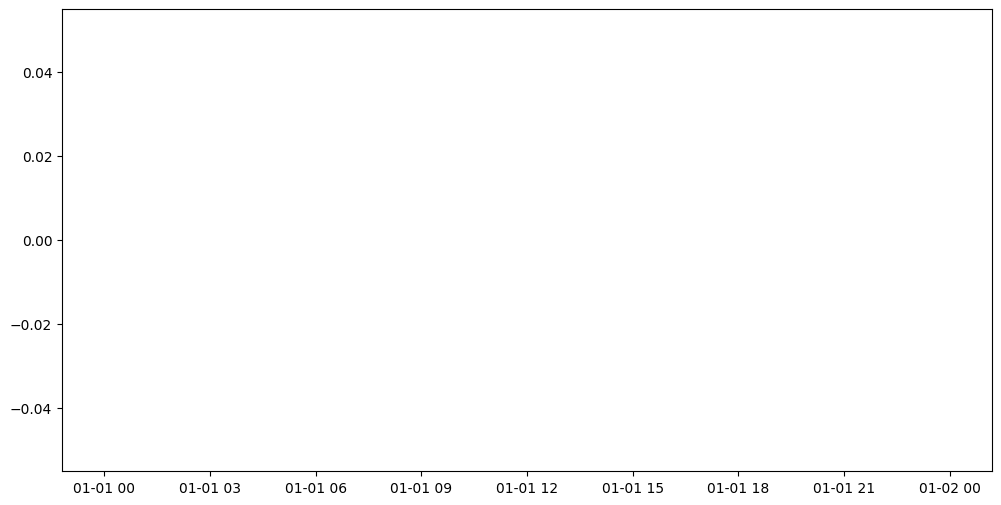

In [50]:
plt.figure(figsize=(12,6))
plt.plot(data['Close'], label = 'Closing pricr over time' )